Fabian Gonzalez Vera | A01367585

# Módulo 5
##  __[Project Block 2: Advanced Statistics, Part 1 - Advanced topics in multiple regression](https://rpubs.com/cdorante/tc3006c_p1)__


In [152]:
# industria asignada - Manufacturing industries

Previous course project data setup

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [154]:
dataf = pd.read_csv('dataus2023.csv') #Load dataset data
firmf = pd.read_csv('firmsus2023.csv')
print(dataf.shape, firmf.shape)

(533088, 22) (5615, 7)


*Merge industry with data*

In [155]:
dataf['qdate'] = pd.PeriodIndex(dataf.q, freq='Q')

In [156]:
firmf.columns

Index(['empresa', 'Nombre', 'status', 'partind', 'naics1', 'naics2',
       'SectorEconomatica'],
      dtype='object')

In [157]:
firms = firmf[['empresa','Nombre','status','naics1']] 
firms.columns=['firm','empresa','status', 'industria']

dataf = pd.merge(dataf, firms, on='firm', how='left') # Merge datasets
dataf.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,adjprice,originalprice,sharesoutstanding,year,fixedassets,yearf,qdate,empresa,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.332411,104.0000,452000.000,2000,NaN,NaN,2000Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,44.911205,73.7500,452271.967,2000,1453000.0,2000.0,2000Q2,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,29.801249,48.9375,453014.579,2000,1581000.0,2000.0,2000Q3,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,33.340861,54.7500,456366.381,2000,1741000.0,2000.0,2000Q4,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,18.713509,30.7300,456769.737,2001,1821000.0,2001.0,2001Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras


In [158]:
dataf.columns

Index(['firm', 'q', 'fiscalmonth', 'revenue', 'cogs', 'sgae', 'otherincome',
       'extraordinaryitems', 'finexp', 'incometax', 'totalassets',
       'currentassets', 'inventory', 'totalliabilities', 'currentliabilities',
       'longdebt', 'adjprice', 'originalprice', 'sharesoutstanding', 'year',
       'fixedassets', 'yearf', 'qdate', 'empresa', 'status', 'industria'],
      dtype='object')

In [159]:
dataf.set_index(['firm','qdate'],inplace=True)
dataf['ry'] = np.log(dataf['adjprice']) - np.log(dataf.groupby(['firm'])['adjprice'].shift(4))

In [160]:

dataf['rq'] = np.log(dataf['adjprice']) - np.log(dataf.groupby(['firm'])['adjprice'].shift(1))

In [161]:
# Calculate future quarterly return

dataf['f1rq'] = dataf.groupby(['firm'])['rq'].shift(-1)
dataf['f4rq'] = dataf.groupby(['firm'])['rq'].shift(-4)

dataf['f1ry'] = dataf.groupby(['firm'])['ry'].shift(-1)
dataf['f4ry'] = dataf.groupby(['firm'])['ry'].shift(-4)

In [162]:
dataf[['rq','f1rq','ry','f4rq','f1ry','f4ry']].head(10)

rq      f1rq        ry      f4rq      f1ry      f4ry
firm qdate                                                             
A    2000Q1       NaN -0.343710       NaN -0.577538       NaN -1.219152
     2000Q2 -0.343710 -0.410137       NaN  0.056001       NaN -0.819441
     2000Q3 -0.410137  0.112233       NaN -0.508265       NaN -0.917569
     2000Q4  0.112233 -0.577538       NaN  0.377280 -1.219152 -0.652522
     2001Q1 -0.577538  0.056001 -1.219152  0.203950 -0.819441  0.128965
     2001Q2  0.056001 -0.508265 -0.819441 -0.390841 -0.917569 -0.317877
     2001Q3 -0.508265  0.377280 -0.917569 -0.593809 -0.652522 -0.403421
     2001Q4  0.377280  0.203950 -0.652522  0.318593  0.128965 -0.462108
     2002Q1  0.203950 -0.390841  0.128965 -0.311725 -0.317877 -0.977783
     2002Q2 -0.390841 -0.593809 -0.317877  0.396554 -0.403421 -0.190388

In [163]:
dataf['ebit'] = dataf['revenue'] - dataf['cogs'] - dataf['sgae']
dataf['opm'] = np.where(dataf['revenue']==0, np.NaN, dataf['ebit']/dataf['revenue'])
dataf['netincome'] = dataf['ebit'] + dataf['otherincome'] + dataf['extraordinaryitems'] - dataf['finexp'] - dataf['incometax']
dataf['pm'] = np.where(dataf['revenue']==0, np.NaN, dataf['netincome']/dataf['revenue'])
dataf['ato'] = np.where(dataf['totalassets']==0, np.NaN, dataf['revenue']/dataf['totalassets'])
dataf['acidratio'] = np.where(dataf['currentliabilities']==0, np.NaN, dataf['currentassets']/dataf['currentliabilities'])
dataf['finlev'] = np.where(dataf['totalassets']==0, np.NaN, dataf['longdebt']/dataf['totalassets'])
dataf['mvalue'] = dataf['originalprice'] * dataf['sharesoutstanding']
dataf['bookvalue'] = dataf['totalassets'] - dataf['totalliabilities']

In [164]:
manufacturyInds = dataf.loc[(dataf['industria']=='Industrias manufactureras')]
MIy22 = manufacturyInds.loc[(manufacturyInds['year']==2022)]
MIy22.head()

q  fiscalmonth    revenue       cogs       sgae  \
firm qdate                                                          
A    2022Q1  2022q1          3.0  1674000.0   764000.0   534000.0   
     2022Q2  2022q2          6.0  3281000.0  1510000.0  1035000.0   
     2022Q3  2022q3          9.0  4999000.0  2289000.0  1563000.0   
     2022Q4  2022q4         12.0  6848000.0  3126000.0  2104000.0   
AA   2022Q1  2022q1          3.0  3293000.0  2181000.0   338000.0   

             otherincome  extraordinaryitems   finexp  incometax  totalassets  \
firm qdate                                                                      
A    2022Q1     -37000.0                 0.0  20000.0    36000.0   10327000.0   
     2022Q2     -44000.0                 0.0  40000.0    95000.0   10455000.0   
     2022Q3     -41000.0                 0.0  57000.0   163000.0   10484000.0   
     2022Q4     -39000.0                 0.0  75000.0   250000.0   10532000.0   
AA   2022Q1      14000.0            -84000.0  25000.0   210000.0   15988000.0   

             ...      f4ry       ebit       opm  netincome        pm  \
firm qdate   ...                                                       
A    2022Q1  ...  0.050974   376000.0  0.224612   283000.0  0.169056   
     2022Q2  ...  0.020909   736000.0  0.224322   557000.0  0.169765   
     2022Q3  ... -0.010338  1147000.0  0.229446   886000.0  0.177235   
     2022Q4  ...       NaN  1618000.0  0.236273  1254000.0  0.183119   
AA   2022Q1  ... -0.741153   774000.0  0.235044   469000.0  0.142423   

                  ato  acidratio    finlev        mvalue  bookvalue  
firm qdate                                                           
A    2022Q1  0.162099   2.193182  0.264356  3.971400e+07  5154000.0  
     2022Q2  0.313821   2.009377  0.261119  3.547756e+07  5122000.0  
     2022Q3  0.476822   1.940063  0.260588  3.598373e+07  5091000.0  
     2022Q4  0.650209   2.030091  0.259495  4.430718e+07  5305000.0  
AA   2022Q1  0.205967   1.615118  0.108019  1.669183e+07  6257000.0  

[5 rows x 39 columns]

In [165]:
manufacturyInds

q  fiscalmonth     revenue       cogs         sgae  \
firm qdate                                                             
A    2000Q1  2000q1          NaN         NaN        NaN          NaN   
     2000Q2  2000q2          6.0   4731000.0  2421000.0  1925000.000   
     2000Q3  2000q3          9.0   7401000.0  3790000.0  3016000.000   
     2000Q4  2000q4         12.0  10773000.0  5522000.0  4198000.000   
     2001Q1  2001q1          3.0   2841000.0  1449000.0  1113000.000   
...             ...          ...         ...        ...          ...   
ZYNE 2022Q3  2022q3          9.0         0.0        0.0    26565.561   
     2022Q4  2022q4         12.0         0.0        0.0    35251.540   
     2023Q1  2023q1          3.0         0.0        0.0    10471.175   
     2023Q2  2023q2          6.0         0.0        0.0    21607.382   
     2023Q3  2023q3          NaN         NaN        NaN          NaN   

             otherincome  extraordinaryitems   finexp  incometax  totalassets  \
firm qdate                                                                      
A    2000Q1          NaN                 NaN      NaN        NaN          NaN   
     2000Q2    73000.000        0.000000e+00    0.000   161000.0  7321000.000   
     2000Q3   101000.000        0.000000e+00    0.000   244000.0  7827000.000   
     2000Q4   111000.000        0.000000e+00    0.000   407000.0  8425000.000   
     2001Q1    19000.000       -2.500000e+04    0.000   119000.0  9208000.000   
...                  ...                 ...      ...        ...          ...   
ZYNE 2022Q3     -893.803        0.000000e+00 -439.590        0.0    62366.738   
     2022Q4     -631.126        7.275958e-12 -846.860        0.0    55520.894   
     2023Q1      -89.983       -1.818989e-12 -447.315        0.0    48636.533   
     2023Q2     -164.559        3.637979e-12 -882.033        0.0    40476.561   
     2023Q3          NaN                 NaN      NaN        NaN          NaN   

             ...      f4ry         ebit       opm   netincome        pm  \
firm qdate   ...                                                          
A    2000Q1  ... -1.219152          NaN       NaN         NaN       NaN   
     2000Q2  ... -0.819441   385000.000  0.081378  297000.000  0.062777   
     2000Q3  ... -0.917569   595000.000  0.080395  452000.000  0.061073   
     2000Q4  ... -0.652522  1053000.000  0.097744  757000.000  0.070268   
     2001Q1  ...  0.128965   279000.000  0.098205  154000.000  0.054206   
...          ...       ...          ...       ...         ...       ...   
ZYNE 2022Q3  ...  0.589607   -26565.561       NaN  -27019.774       NaN   
     2022Q4  ...       NaN   -35251.540       NaN  -35035.806       NaN   
     2023Q1  ...       NaN   -10471.175       NaN  -10113.843       NaN   
     2023Q2  ...       NaN   -21607.382       NaN  -20889.908       NaN   
     2023Q3  ...       NaN          NaN       NaN         NaN       NaN   

                  ato  acidratio    finlev        mvalue    bookvalue  
firm qdate                                                             
A    2000Q1       NaN        NaN       NaN  4.700800e+07          NaN  
     2000Q2  0.646223   2.313358  0.000000  3.335506e+07  4642000.000  
     2000Q3  0.945573   2.129084  0.000000  2.216940e+07  4902000.000  
     2000Q4  1.278694   2.050399  0.000000  2.498606e+07  5265000.000  
     2001Q1  0.308536   1.778827  0.000000  1.403653e+07  5541000.000  
...               ...        ...       ...           ...          ...  
ZYNE 2022Q3  0.000000   6.446702  0.002865  3.349125e+04    52756.754  
     2022Q4  0.000000   5.971593  0.002153  2.494324e+04    46228.757  
     2023Q1  0.000000   4.950694  0.001233  2.294157e+04    38966.551  
     2023Q2  0.000000   3.430081  0.000000  1.749071e+04    29020.570  
     2023Q3       NaN        NaN       NaN  7.120005e+04          NaN  

[216105 rows x 39 columns]

***
## 1.1 Descriptive Statistics

*For the Descriptive Statistics of your industry using only the most recent fiscal year observations (fiscalmonth=12, year=2022), do the following modifications:*

*For the ratios, instead of calculating the arithmetic mean of the ratios, calculate the weighted average of the ratios.* 

*Compare this weighted average with the arithmetic mean and the median. Which is the best measure for central tendency of the ratios? Interpret the weighted average of profit margin and asset turn over of your industry.*

**R:**
Weighted averages is the better measure because it reflects the importance of each observation and how much does a thing contributes to total of something. In this example the weighted average of the profit margin(pm) is 0.107 and for the asset turn over(ato) is 0.465, this means that the ato has more relevance than the pm, when compared to the mean and median it is harder to determine their relevance as some of the statistics are in the negative and others are smaller than 1, and the problem is that we don´t really know in comparision with what are they relevant.

In [166]:
aux = MIy22

print('weighted average of opm       : ', '%.3f'%(aux['ebit'].sum()/aux['revenue'].sum()))
print('weighted average of pm        : ', '%.3f'%(aux['netincome'].sum()/aux['revenue'].sum()))
print('weighted average of ato       : ', '%.3f'%(aux['revenue'].sum()/aux['totalassets'].sum()))
print('weighted average of acidratio : ', '%.3f'%(aux['currentassets'].sum()/aux['currentliabilities'].sum()))
print('weighted average of finlev    : ', '%.3f'%(aux['longdebt'].sum()/aux['totalassets'].sum()))

weighted average of opm       :  0.143
weighted average of pm        :  0.107
weighted average of ato       :  0.465
weighted average of acidratio :  1.482
weighted average of finlev    :  0.263


In [167]:
aux = MIy22[['opm','pm','ato','acidratio','finlev']]
aux.describe()

,opm,pm,ato,acidratio,finlev
count,5272.000000,5272.000000,6285.000000,6273.000000,6285.000000
mean,-25.185582,-25.395869,0.379704,5.565042,0.221564
std,294.616670,306.027779,0.481799,8.246283,0.597456
min,-10287.583333,-10483.111111,-0.014311,0.001071,0.000000
25%,-0.768249,-0.799924,0.032699,1.747670,0.023978
50%,0.018442,0.004894,0.253958,2.869306,0.150741
75%,0.125726,0.092543,0.558648,6.167385,0.312131
max,1290.294118,1245.779412,13.562387,201.084988,28.659623


***
## 1.2 Multiple Regression - advanced topics

### 1.2.1 Calculation of Variables

*For the complete historical dataset of annual fiscal years (fiscalmonth=12 for all quarter-years), you have to calculate the following new independent variables:*

-*Firm size as a categorical variable. For each quarter, you have to label firms in 3 equal groups: small, medium, big according to the market value of the firms.*

-*Calculate the corresponding dummy (binary) variables for the firm size following the dummy encoding method.*

-*Calculate operating earnings per share deflated by stock price: oepsp = (ebit / sharesoutstanding) / originalprice*

-*Calculate earnings per share deflated by stock price: epsp = (netincome / sharesoutstanding) / originalprice*

-*Calculate book-to-market ratio: bmr = bookvalue / marketvalue*

*In this model, the variable you have to use as dependent variable will be annual stock returns (instead of quarterly returns) one quarter in the future (f1.ry).*

In [168]:
# industria asignada - Manufacturing industries

manufacturyInds['fsize'] = manufacturyInds.groupby(manufacturyInds['q'])['mvalue'].transform(lambda x: pd.qcut(x,3,labels=['small','medium','big']))
manufacturyInds['gsize'] = manufacturyInds['fsize']
manufacturyInds = pd.get_dummies(manufacturyInds,columns=['fsize'],drop_first=True, dtype=float)#,dummy_na=True)
# For producing the categorical variable the firms where group in 3 groups and assigned their size
# Then this data was transformed into dummies, meaning they were transformed into 2 columns of 1´s and 0´s, 
# and the combination of medium and big being 0 means the firm size is small


manufacturyInds['oepsp'] = (manufacturyInds['ebit']/manufacturyInds['sharesoutstanding'])/manufacturyInds['originalprice'] #operating earnings per share deflated by stock price: oepsp = (ebit / sharesoutstanding) / originalprice
manufacturyInds['epsp'] = (manufacturyInds['netincome']/manufacturyInds['sharesoutstanding'])/manufacturyInds['originalprice'] #earnings per share deflated by stock price: epsp = (netincome / sharesoutstanding) / originalprice
manufacturyInds['bmr'] = manufacturyInds['bookvalue']/manufacturyInds['mvalue'] #  book-to-market ratio: bmr = bookvalue / marketvalue
MIy = manufacturyInds.loc[(manufacturyInds['fiscalmonth']==12)]# select data for active firms and for the final fiscal month
MIy

C:\Users\fabig\AppData\Local\Temp\ipykernel_26588\3564852202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturyInds['fsize'] = manufacturyInds.groupby(manufacturyInds['q'])['mvalue'].transform(lambda x: pd.qcut(x,3,labels=['small','medium','big']))
C:\Users\fabig\AppData\Local\Temp\ipykernel_26588\3564852202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturyInds['gsize'] = manufacturyInds['fsize']


q  fiscalmonth     revenue       cogs         sgae  \
firm qdate                                                             
A    2000Q4  2000q4         12.0  10773000.0  5522000.0  4198000.000   
     2001Q4  2001q4         12.0   8396000.0  5166000.0  4008000.000   
     2002Q4  2002q4         12.0   6010000.0  3694000.0  3923000.000   
     2003Q4  2003q4         12.0   6056000.0  3762000.0  3019000.000   
     2004Q4  2004q4         12.0   7181000.0  4058000.0  2737000.000   
...             ...          ...         ...        ...          ...   
ZYNE 2018Q4  2018q4         12.0        86.0        0.0    40483.830   
     2019Q4  2019q4         12.0         0.0        0.0    34319.810   
     2020Q4  2020q4         12.0         0.0        0.0    52062.542   
     2021Q4  2021q4         12.0         0.0        0.0    36770.390   
     2022Q4  2022q4         12.0         0.0        0.0    35251.540   

             otherincome  extraordinaryitems    finexp  incometax  \
firm qdate                                                          
A    2000Q4   111000.000        0.000000e+00     0.000   407000.0   
     2001Q4   301000.000        5.800000e+05     0.000   -71000.0   
     2002Q4    60000.000       -1.000000e+04     0.000  -525000.0   
     2003Q4    35000.000       -2.680000e+05     0.000  1100000.0   
     2004Q4    54000.000        0.000000e+00     0.000    91000.0   
...                  ...                 ...       ...        ...   
ZYNE 2018Q4     -474.668        0.000000e+00  -961.323        0.0   
     2019Q4     -145.911        0.000000e+00 -1522.138        0.0   
     2020Q4      481.719        0.000000e+00  -243.992        0.0   
     2021Q4     -559.681        0.000000e+00   -21.047        0.0   
     2022Q4     -631.126        7.275958e-12  -846.860        0.0   

             totalassets  ...  acidratio    finlev        mvalue    bookvalue  \
firm qdate                ...                                                   
A    2000Q4  8425000.000  ...   2.050399  0.000000  2.498606e+07  5265000.000   
     2001Q4  7986000.000  ...   2.397103  0.000000  1.321995e+07  5659000.000   
     2002Q4  8203000.000  ...   2.237506  0.140193  8.387759e+06  4627000.000   
     2003Q4  6297000.000  ...   2.040399  0.182627  1.392260e+07  2824000.000   
     2004Q4  7056000.000  ...   2.446285  0.162982  1.173287e+07  3569000.000   
...                  ...  ...        ...       ...           ...          ...   
ZYNE 2018Q4    67327.443  ...   6.884329  0.000000  5.235181e+04    57601.661   
     2019Q4    87764.596  ...   7.219675  0.001250  1.401160e+05    75596.743   
     2020Q4    74056.776  ...   5.273116  0.000000  9.714928e+04    60143.528   
     2021Q4    81171.507  ...   8.099352  0.004357  1.187065e+05    70913.334   
     2022Q4    55520.894  ...   5.971593  0.002153  2.494324e+04    46228.757   

             gsize  fsize_medium  fsize_big     oepsp      epsp       bmr  
firm qdate                                                                 
A    2000Q4    big           0.0        1.0  0.042144  0.030297  0.210718  
     2001Q4    big           0.0        1.0 -0.058850  0.013162  0.428065  
     2002Q4    big           0.0        1.0 -0.191589 -0.123036  0.551637  
     2003Q4    big           0.0        1.0 -0.052074 -0.147817  0.202836  
     2004Q4    big           0.0        1.0  0.032899  0.029745  0.304188  
...            ...           ...        ...       ...       ...       ...  
ZYNE 2018Q4  small           0.0        0.0 -0.771661 -0.762365  1.100280  
     2019Q4  small           0.0        0.0 -0.244939 -0.235117  0.539530  
     2020Q4  small           0.0        0.0 -0.535903 -0.528432  0.619084  
     2021Q4  small           0.0        0.0 -0.309759 -0.314296  0.597384  
     2022Q4  small           0.0        0.0 -1.413270 -1.404621  1.853358  

[22854 rows x 45 columns]

In [169]:
import statsmodels.api as sm
# Add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
regm = MIy.copy()
regm = regm.dropna()
x = regm[['pm','ato','epsp','oepsp','bmr','fsize_medium','fsize_big']]
X = sm.add_constant(x)

y = regm[['f1ry']]

mkmodel = sm.OLS(y,X,missing='drop').fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     352.6
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:21:45   Log-Likelihood:                -14154.
No. Observations:               17188   AIC:                         2.832e+04
Df Residuals:                   17180   BIC:                         2.839e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0468      0.009     -5.358   

***
## 1.2.2 Winsorization of variables

*You have to check for very extreme values for the following ratios: profit margin, asset turn over, oepsp, bmr. Apply winsorization in case of very extreme values (keep at lest 98% of original values for each winsorization). Use the histogram to decide the level of winsorization.*

In [170]:
manufacturyInds[['pm','ato','epsp','oepsp','bmr']].describe()#Quick check for infs and nans

,pm,ato,epsp,oepsp,bmr
count,85470.000000,93014.000000,8.834300e+04,8.834300e+04,8.848200e+04
mean,-18.317029,7.013129,-inf,inf,inf
std,355.115903,1979.948288,NaN,NaN,NaN
min,-41501.684211,-0.145279,-inf,-1.793820e+05,-1.383779e+06
25%,-0.119142,0.152637,-5.015168e-02,-4.515157e-02,1.882336e-01
50%,0.034176,0.374852,9.416890e-03,1.599892e-02,3.526563e-01
75%,0.089625,0.699228,3.243069e-02,5.024122e-02,6.075316e-01
max,1533.205128,603848.692765,4.453706e+05,inf,inf


In [171]:
MIy.replace([np.inf, -np.inf], np.nan, inplace=True) #Convert infs to nans
MIy[['pm','ato','epsp','oepsp','bmr',]].describe()

C:\Users\fabig\AppData\Local\Temp\ipykernel_26588\4096647721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MIy.replace([np.inf, -np.inf], np.nan, inplace=True) #Convert infs to nans


,pm,ato,epsp,oepsp,bmr
count,21162.000000,22852.000000,21813.000000,21813.000000,2.184700e+04
mean,-17.242080,27.267082,-10.268930,6.349524,5.795745e+02
std,310.680516,3994.528689,2598.833705,1736.639845,8.291206e+04
min,-24414.000000,-0.145279,-357470.651014,-112486.659552,-7.280929e+01
25%,-0.127081,0.370506,-0.096918,-0.085405,1.887151e-01
50%,0.034617,0.728471,0.022539,0.036787,3.530152e-01
75%,0.089863,1.101250,0.053608,0.082026,6.055761e-01
max,1245.779412,603848.692765,139730.031729,229224.858601,1.224872e+07


C:\Users\fabig\AppData\Local\Temp\ipykernel_26588\1439968809.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


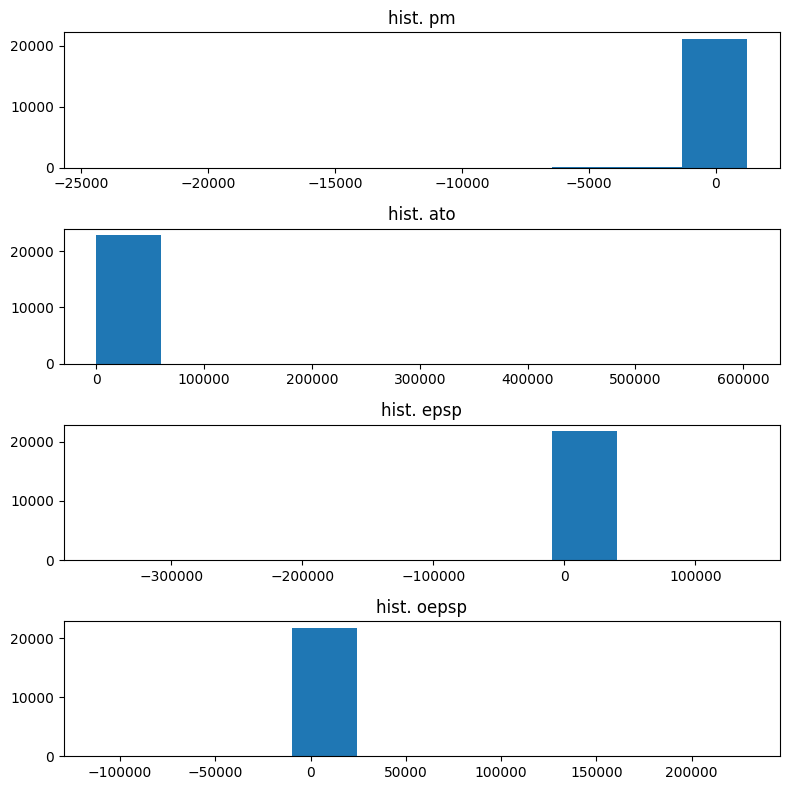

In [172]:
sv = ['pm','ato','epsp','oepsp','bmr']
f, axes = plt.subplots(4,1, constrained_layout=True, figsize=(8,8))
lc = 0
for c, i in enumerate(axes):
    vals = pd.DataFrame(MIy[[sv[lc]]])
    axes[c].hist(vals)
    axes[c].set_title('hist. ' + sv[lc], loc='center', wrap=True)
    lc+=1
plt.tight_layout()

Histogram shows plenty of empty space around the most common values.

C:\Users\fabig\AppData\Local\Temp\ipykernel_26588\1699706883.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


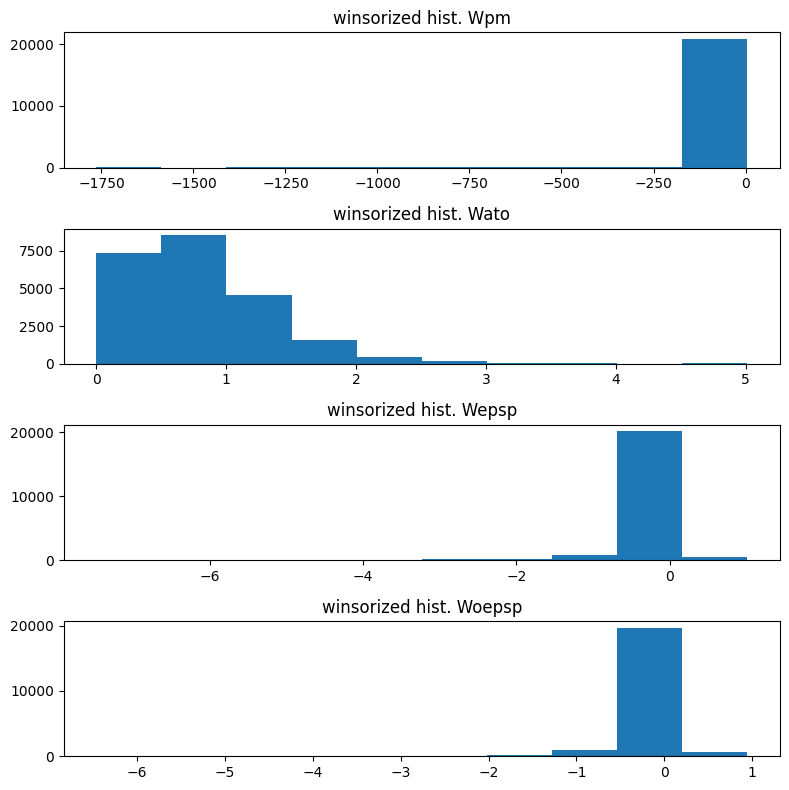

In [173]:
sv = ['Wpm','Wato','Wepsp','Woepsp','Wbmr']
wMI = MIy.copy()
wMI['Wpm'] = wMI['pm'].clip(lower=wMI['pm'].quantile(0.002,interpolation='lower'),
                            upper=wMI['pm'].quantile(0.999,interpolation='higher'))

wMI['Wato'] = wMI['ato'].clip(lower=wMI['ato'].quantile(0.002,interpolation='lower'),
                              upper=wMI['ato'].quantile(0.999,interpolation='higher'))

wMI['Wepsp'] = wMI['epsp'].clip(lower=wMI['epsp'].quantile(0.002,interpolation='lower'),
                                upper=wMI['epsp'].quantile(0.999,interpolation='higher'))

wMI['Woepsp'] = wMI['oepsp'].clip(lower=wMI['oepsp'].quantile(0.002,interpolation='lower'),
                                  upper=wMI['oepsp'].quantile(0.999,interpolation='higher'))

wMI['Wbmr'] = wMI['bmr'].clip(lower=wMI['bmr'].quantile(0.002,interpolation='lower'),
                                upper=wMI['bmr'].quantile(0.999,interpolation='higher'))

f, axes = plt.subplots(4,1, constrained_layout=True, figsize=(8,8))
lc = 0
for c,i in enumerate(axes):
    vals = pd.DataFrame(wMI[[sv[lc]]])
    #print(manufacturyInds[[sv[lc]]])
    #vals = winsorize(vals[sv[lc]], limits=[0.02, 0.02])
    axes[c].hist(vals)
    axes[c].set_title('winsorized hist. ' + sv[lc], loc='center', wrap=True)
    lc+=1
plt.tight_layout()

Applying winsorization reduces the range of numbers in the histogram, meaning that extreme values have been reduced. But the data is still skewed to either the left or the right.

***
## 1.2.3 Multicollinearity
*Do the multicollienarity test considering all numeric independent variables:*

*profit margin, asset turn over, epsp, oepsp, bmr*

*Interpret the test. If there is a multicollienarity problem, propose how to solve it.*

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
mco = wMI.copy()
mco = wMI.dropna()
x = mco[['Wpm','Wato','Wepsp','Woepsp','Wbmr','fsize_medium','fsize_big']]
X = sm.add_constant(x)

vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 
#print(vif_df)
#predVars = ['Wpm','Wato','Wepsp','Woepsp','Wbmr']
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df

,variable,VIF
0,const,7.881695
1,Wpm,1.037848
2,Wato,1.082783
3,Wepsp,7.781941
4,Woepsp,8.009320
5,Wbmr,1.080327
6,fsize_medium,1.515231
7,fsize_big,1.603965


When using variance inflation factor for detecting multicollinearity the values that show a level of worrying correlation is if a value is above 5, in this test epsp and oepsps show a VIF value greater than 5, meaning some actions must be taken to reduce multicollinearity, a solution is dropping a one of the value, in this case oepsps as is the one with the biggest VIF value.

In [175]:
mco = wMI.copy()
mco = wMI.dropna()
x = mco[['Wpm','Wato','Wepsp','Wbmr','fsize_medium','fsize_big']]
X = sm.add_constant(x)

vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 
#print(vif_df)
#predVars = ['Wpm','Wato','Wepsp','Woepsp','Wbmr']
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df

,variable,VIF
0,const,7.834923
1,Wpm,1.036898
2,Wato,1.054563
3,Wepsp,1.153386
4,Wbmr,1.077771
5,fsize_medium,1.508139
6,fsize_big,1.594785


Upon removing oepsps, the VIF value of epsp dropped below 5, meaning epsp has a moderate correlation.

***
## 1.2.4 Multiple regression model
*Run a first multiple regression model to examine whether the financial ratios and firm size explain/predict future annual stock returns (one quarter later). For the ratios, use the winsorized version (if the ratio has extreme values)*

*Interpret the results of each coefficient (beta and their statistical significance). Remember that the coefficients of categorical dummies have a special interpretation.*

In [176]:
regm = wMI.copy()
regm = regm.dropna()
x = regm[['Wpm','Wato','Wepsp','Wbmr','fsize_medium','fsize_big']]
X = sm.add_constant(x)

y = regm[['f1ry']]

mkmodel = sm.OLS(y,X,missing='drop').fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     563.5
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:21:48   Log-Likelihood:                -13764.
No. Observations:               17188   AIC:                         2.754e+04
Df Residuals:                   17181   BIC:                         2.760e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0080      0.012      0.695   

The dependependent variable is the **future annual stock returns** (f4ry). The independent variables are **pm**, **ato**, **epsp**, **bmr** and dummies for the firm sizes **fsize_medium** and **fsize_bing** where if both values are 0 then the firm size is small.

H0: B0 = 0; Ha: B0 < 0<br>B0 is less than 0, this means that it is not significantly less than 0.

<br>H0: B1 = 0 There is no relationship between the ****future annual stock returns**** and the **PM**; Ha: B1 > 0 There is a negative relationship between the **future annual stock returns** and the **PM**.<br>
**PM** coefficient is positive, the absolute t-value is greater than 2, the p-value is less than 0.05 and the 95% is 0, this means that there is enough statistical evidence at the 95% interval to say that B1 is significantly greater than 0 and there is a positive relationship between the **PM** and the **future annual stock return**.

<br>H0: B2 = 0 There is no relationship between the ****future annual stock returns**** and the **ATO**; Ha: B2 > 0 There is a negative relationship between the **future annual stock returns** and the **ATO**.<br>
**ATO** coefficient is positive, the absolute t-value is greater than 2, the p-value is less than 0.05 and the 95% is 0.61, this means that there is enough statistical evidence at the 95% interval to say that B2 is significantly greater than 0 and there is a positive relationship between the **ATO** and the **future annual stock return**.

<br>H0: B3 = 0 There is no relationship between the ****future annual stock returns**** and the **EPSP**; Ha: B3 > 0 There is a negative relationship between the **future annual stock returns** and the **EPSP**.<br>
**EPSP** coefficient is positive, the absolute t-value is greater than 2, the p-value is less than 0.05 and the 95% is 0.446, this means that there is enough statistical evidence at the 95% interval to say that B3 is significantly greater than 0 and there is a positive relationship between the **EPSP** and the **future annual stock return**.

<br>H0: B4 = 0 There is no relationship between the ****future annual stock returns**** and the **BMR**; Ha: B4 > 0 There is a negative relationship between the **future annual stock returns** and the **BMR**.<br>
**BMR** coefficient is positive, the absolute t-value is greater than 2, the p-value is less than 0.05 and the 95% is -0.125, this means that there is enough statistical evidence at the 95% interval to say that B4 is significantly greater than 0 and there is a positive relationship between the **BMR** and the **future annual stock return**.

Because the categorical coefficients there are 3 equations. The main difference is the change in the slope, as the values that the categorical predictors can take is 0 or 1, this means that the categorical coefficients get cancelled because they are multiplied by 0 or they change the slope because they are multiplied by 1.
<br>

For small firms the equation is y = 0.0080 + 4.564e-05pm + 0.0467ato + 0.4269epsp - 0.1405bmr<br>
For medium firms is y = 0.0754 + 4.564e-05pm + 0.0467ato + 0.4269epsp - 0.1405bmr<br>
For big firms is y = 0.0962 + 4.564e-05pm + 0.0467ato + 0.4269epsp - 0.1405bmr<br>

The equations mean that the medium and big firms future annual returns are greater than the small firms returns.

*Add interaction terms between firm size and earnings per share deflated by price (epsp or oepsp, in case you eliminated one due to multicollienarity). Re-run the regression and INTERPRET the interaction between these two variables. Also, state the regression equation for each size group.*

*Interpret the R-squared of the model*

In [177]:
import statsmodels.formula.api as smf
formula = 'f1ry ~ Wpm + Wato + Wepsp + Wbmr + fsize_medium + fsize_big + fsize_medium:Wepsp + fsize_big:Wepsp'
regInts = smf.ols(formula,data=regm).fit()
print(regInts.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:21:48   Log-Likelihood:                -13758.
No. Observations:               17188   AIC:                         2.753e+04
Df Residuals:                   17179   BIC:                         2.760e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0087      0

With the interaction effects added, the equations change.<br>

For small firms the equation remains the same because fsize_medium and fsize_big must be 0 for the equation to be that of small firms.<br>
y = 0.0087 + 4.357e-05pm + 0.0445ato + 0.4208epsp - 0.1414 bmr

<br>Now for medium and big firms things change.<br>
For medium firms the equation is now:<br>
y = 0.0797 + 4.357e-05pm + 0.0445ato + 0.5559epsp - 0.1414 bmr<br>

For big firms the equation is now:<br>
y = 0.1005+ 4.357e-05pm + 0.0445ato + 0.3644epsp - 0.1414 bmr<br>

R-squared is 0.165, this means that there is a 16.5% variation in the annual returns that can be explained by the changes in the independent variables.

*Run a multiple regression but now using only the last complete year of data (yearf=2022)*

*What differences do you see compared with the previous model? Explain*


In [193]:
regm = wMI.copy()
regm = regm.loc[(regm['yearf']==2022) & (regm['fiscalmonth']==12)]
#regm = regm.dropna()
regInts = smf.ols(formula,data=regm).fit()
print(regInts.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     147.0
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          4.91e-174
Time:                        12:24:26   Log-Likelihood:                -961.35
No. Observations:                1258   AIC:                             1941.
Df Residuals:                    1249   BIC:                             1987.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.5165      0

The R-squared is bigger, so now there is a 48.5% of variation in the annual returns that can be explained by the changes in the independent variables.

The coefficientes are bigger but in general the metrics remain similar.



***
## 1.2.5 Regression Diagnosis
*Do a diagnosis for possible outliers and influential observations, but using only annual data for 2022. You will end up with a cross-sectional sample with the most recent financial information.*


In [179]:
# regression diagnosis

sample22 = wMI.copy()
sample22 = sample22.loc[(sample22['yearf']==2022) & (sample22['fiscalmonth']==12)]

In [180]:
sample22

,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,fsize_medium,fsize_big,oepsp,epsp,bmr,Wpm,Wato,Wepsp,Woepsp,Wbmr
firm,qdate,,,,,,,,,,,,,,,,,,,,,
A,2022Q4,2022q4,12.0,6848000.0,3126000.0,2104000.00,-39000.000,0.000000e+00,75000.00,250000.0,1.053200e+07,...,0.0,1.0,0.036518,0.028302,0.119732,0.183119,0.650209,0.028302,0.036518,0.119732
AA,2022Q4,2022q4,12.0,12451000.0,10212000.0,1549000.00,118000.000,-1.610000e+05,106000.00,664000.0,1.475600e+07,...,0.0,1.0,0.085764,-0.015288,0.818984,-0.009879,0.843792,-0.015288,0.085764,0.818984
AAOI,2022Q4,2022q4,12.0,222818.0,189191.0,92625.00,-1205.000,0.000000e+00,6193.00,1.0,4.082630e+05,...,0.0,0.0,-1.094383,-1.231631,3.425535,-0.297988,0.545771,-1.231631,-1.094383,3.425535
AAON,2022Q4,2022q4,12.0,888788.0,651216.0,110811.00,399.000,0.000000e+00,2627.00,24157.0,8.139030e+05,...,0.0,1.0,0.031635,0.025050,0.139934,0.112936,1.092007,0.025050,0.031635,0.139934
AAPL,2022Q3,2022q3,12.0,394328000.0,223546000.0,51345000.00,-334000.000,0.000000e+00,0.00,19300000.0,3.527550e+08,...,0.0,1.0,0.053777,0.044937,0.022815,0.253096,1.117852,0.044937,0.053777,0.022815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNTL,2022Q4,2022q4,12.0,0.0,0.0,227287.00,0.000,-1.597500e+04,-5987.00,-469.0,5.393100e+05,...,1.0,0.0,-0.197748,-0.206029,0.377616,NaN,0.000000,-0.206029,-0.197748,0.377616
ZTS,2022Q4,2022q4,12.0,8080000.0,2454000.0,2709000.00,-40000.000,3.000000e+03,221000.00,545000.0,1.492500e+07,...,0.0,1.0,0.042707,0.030950,0.064463,0.261634,0.541374,0.030950,0.042707,0.064463
ZVIA,2022Q4,2022q4,12.0,163181.0,93160.0,117889.00,286.000,1.379000e+04,0.00,65.0,9.893200e+04,...,1.0,0.0,-0.169924,-0.120187,0.290327,-0.207481,1.649426,-0.120187,-0.169924,0.290327


*Using this cross-sectional dataset with only annual data for 2022, you have to do the following:*

- *Using matrix algebra calculate the beta coefficients of the same regression model*

In [181]:
# Using matrix algebra to estimate the beta coefficients:
# I add the column of 1's to the dataframe:
sample22['constant'] = 1
selcols = ['constant','Wpm','Wato','Wepsp','Wbmr','fsize_medium','fsize_big']
sample22 = sample22.dropna()
# I set x as a matrix with the column of 1's and the values of X:
x = sample22[selcols].values
# I set y as the dependent variable:
y = sample22['f4ry'].values
# I calculate the matrix multiplication X'X:
xtx = np.matmul(x.transpose(),x)
# I calculate the matrix multiplication X'Y:
xty = np.matmul(x.transpose(),y)
# I get the inverse of the matrix (X'X) to solve for the beta coefficients:
invtxt = np.linalg.inv(xtx)
# I multiply inv(X'X)*X'Y to get the estimation of the beta vector (beta0 and beta1 coefficients) 
betas = np.matmul(invtxt,xty)
list(betas)

[-0.22690045792617752,
 0.011787198078643368,
 0.2020130270434495,
 0.2666389878991078,
 -0.061018460518466155,
 0.24851548337506713,
 0.19022882349358294]

- *Using matrix algebra calculate the Hat Matrix*

In [182]:
#The formular for calculating the Hat Matrix is h = X((X'X)^-1)*X'
xtranspose = x.transpose() # X'
xtxinv = np.linalg.inv(np.matmul(xtranspose,x)) #(X'X)^-1
xmxtxinv = np.matmul(x,xtxinv) #X((X'X)^-1)
hat = np.matmul(xmxtxinv,xtranspose) # X((X'X)^-1)*X'
hat

array([[ 1.64646292e-02,  6.43011862e-04,  7.90301060e-05, ...,
         4.77133504e-03,  1.07220090e-02, -1.26102811e-02],
       [ 6.43011862e-04,  2.24633772e-02,  1.76579349e-02, ...,
        -6.78054050e-03,  7.76694918e-04, -1.48766309e-02],
       [ 7.90301060e-05,  1.76579349e-02,  2.00379560e-02, ...,
         2.70129352e-03, -5.55120172e-04,  5.87897148e-03],
       ...,
       [ 4.77133504e-03, -6.78054050e-03,  2.70129352e-03, ...,
         3.63351421e-02,  1.34783531e-02,  4.39704625e-02],
       [ 1.07220090e-02,  7.76694918e-04, -5.55120172e-04, ...,
         1.34783531e-02,  1.33275411e-02,  1.45296318e-03],
       [-1.26102811e-02, -1.48766309e-02,  5.87897148e-03, ...,
         4.39704625e-02,  1.45296318e-03,  3.33330158e-01]])

- *With the hat matrix identify possible leverage observations. EXPLAIN why these observations can be leverage points.*

In [183]:
# Leverages are the diagonal of the hat matrix, because a leverage is hii
highLevObs = []
hloi = []
levs = np.diag(hat)
c=0
mlevValby3 = 3 * ((len(selcols) + 1)/len(sample22)) # 3((k+1)/n), where k is number of parameters & n is number of datapoints
for i in levs:
    if i > mlevValby3:
        highLevObs.append(i)
        hloi.append(c)
    c+=1

print('mean leverage value times 3: ',mlevValby3)
print('Number of X values with potentially large influence:',len(highLevObs))
print('X values that have potentially large influence:')
d = {'mlevValby3': mlevValby3, 'rowind': hloi}
possibleLeverageObs = pd.DataFrame(data=d)
possibleLeverageObs

mean leverage value times 3:  0.13636363636363635
Number of X values with potentially large influence: 4
X values that have potentially large influence:


,mlevValby3,rowind
0,0.136364,15
1,0.136364,91
2,0.136364,145
3,0.136364,175


A datapoint is a high leverage observation if it has extreme X values, but not every high leverage observations are influential, if they affect the the regression function. The previous points are flagged as possible high leverage observations if it is 3 times larger than the mean leverage value. We use this metric as the model is a multivaritate regression, as such it is not possible to use a graphical represetation to infer possible high leverage observations. Generally speaking if they tend to follow the regression line pattern they are probably not influential, but if they affect the line they are influential.

- *Identify possible outliers using studentized residuals. EXPLAIN your criteria to identify these outliers, and how studentized residuals work.*

In [184]:
influence = regInts.get_influence()
studentized_residuals = (influence.resid_studentized_external)

st_outliers = []
st_outliers_aux = []
c=0
for i in studentized_residuals:
    if np.absolute(i) >= 3: 
        st_outliers.append(i)
        st_outliers_aux.append(c)
    c=c+1
    
print('Possible Outliers detected using studentized residuals:')
d = {'studentized_res': st_outliers, 'pos': st_outliers_aux}
st_outliersdf = pd.DataFrame(data=d)
st_outliersdf

Possible Outliers detected using studentized residuals:


,studentized_res,pos
0,-3.512611,17
1,-3.126317,50
2,-3.589992,107


(array([ 4.,  2.,  4., 14., 37., 45., 45., 20.,  3.,  2.]),
 array([-3.58999158, -2.93377782, -2.27756407, -1.62135031, -0.96513655,
        -0.30892279,  0.34729096,  1.00350472,  1.65971848,  2.31593223,
         2.97214599]),
 <BarContainer object of 10 artists>)

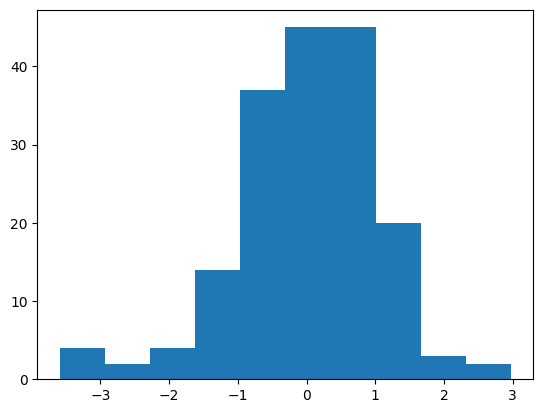

In [185]:
plt.hist(studentized_residuals)

Studentized residuals is a measure used to identify outliers or unsual Y values, the gist of it is that it removes observations one at a time, then refits the model into the n-1 dataset because an outlier causes the funtion to be pulled towards the datapoint so when it is removed, the line bounces back.
It´s calculated by dividing the residual by its estimated standard deviation.<br>
t = di/s(di)<br>
Generally the criteria for identifying outliers is that if the absolute value of the studentized residual is greater than 3, then it is an outlier.

- *Identify possible outliers using Cook’s distance. EXPLAIN your criteria to identify outliers with Cook’s distance and how they work.*

In [186]:
'''
Cook´s Distance guidelines
Some texts say that:
    If Di is greater than 0.5, then the ith data point is worthy of further investigation as it may be influential.
    If Di is greater than 1, then the ith data point is quite likely to be influential.
    Or, if Di sticks out like a sore thumb from the other Di values, it is almost certainly influential.
Other texts say that:
    The threshold for considering a data point influential is if Di > 4/N, where N is num of obs
    if the Di is greater that three times the mean of cook´s distance then it might be an outliers
'''
cooks_d = influence.cooks_distance
cook_outliers1 = []
cook_outliers2 = []
cook_outliers3 = []
cook_outliers1aux = []
cook_outliers2aux = []
cook_outliers3aux = []

c=0
for i in cooks_d[0]:
    if i >= 0.5: 
        cook_outliers1.append(i)
        cook_outliers1aux.append(c)
    if i >= 3*np.mean(cooks_d[0]): 
        cook_outliers2.append(i)
        cook_outliers2aux.append(c)
    if i >= 4/(len(sample22)): 
        cook_outliers3.append(i)
        cook_outliers3aux.append(c)
    c+=1
        #cook_outliers.append(i)
    
#print('Possible Outliers detected using Cook´s distance:')
print('Greater than 0.5, produces possible outliers: ',len(cook_outliers1))
print('Greater than 3 times the mean of distance, produces possible outliers: ',len(cook_outliers2)) 
print('Greater than 4/N, produces possible outliers: ',len(cook_outliers3))



Greater than 0.5, produces possible outliers:  2
Greater than 3 times the mean of distance, produces possible outliers:  5
Greater than 4/N, produces possible outliers:  11


(array([172.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([8.49653959e-08, 4.22357052e-01, 8.44714018e-01, 1.26707098e+00,
        1.68942795e+00, 2.11178492e+00, 2.53414188e+00, 2.95649885e+00,
        3.37885582e+00, 3.80121278e+00, 4.22356975e+00]),
 <BarContainer object of 10 artists>)

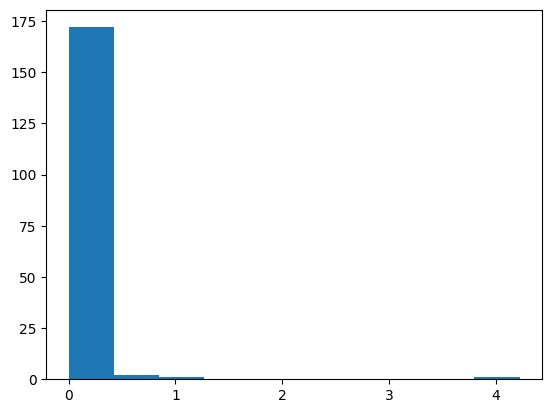

In [187]:
plt.hist(cooks_d[0])

There is conflicting information to what metric to compare in order to flag a possible outlier, some texts say that if the Di is greater than 0.5 that datapoint nay be influential, others say that if the Di is greater than 3 times the mean of Cook´s Distance then it may be an outlier and others say that if the Di is greater than 4/(N-K-1) where N is number of observations and K is the number of variables.

Given the number of possible outliers the most likely to be correct cutoff value for Cook´s Distance is 4/N, because if the value is greater than 0.5 flagged 0 possible outliers meanwhile if the Di value is Greater than 3 times the mean of Di it flagged 5 possible outliers, and 4/N flagged 11 possible outliers.


Cook´s Distance(Di) summarizes how much all fitted values change when a particular observation is deleted, with a large Di indicating that a data point has a strong influence on the fitted values.

In [188]:
print('Possible Outliers detected using Cook´s distance:')
d = {'Cook_d': cook_outliers3, 'pos': cook_outliers3aux}
cook_outliersdf = pd.DataFrame(data=d)
cook_outliersdf

Possible Outliers detected using Cook´s distance:


,Cook_d,pos
0,0.036472,5
1,0.126615,15
2,0.437469,17
3,0.039359,50
4,0.053543,76
5,0.057595,78
6,0.062180,107
7,1.211006,132
8,4.223570,145
9,0.028639,149


- *Using studentized residuals and Cook’s distance identify possible influential observations. EXPLAIN your criteria.*
- *List the influential observations and decide whether to drop them or keep some of them*

In [189]:
dataf = pd.merge(cook_outliersdf, st_outliersdf, on='pos', how='left') # Merge datasets
dataf = dataf.dropna()
dataf

,Cook_d,pos,studentized_res
2,0.437469,17,-3.512611
3,0.039359,50,-3.126317
6,0.062180,107,-3.589992


I have decided to drop the rows were flagged as potential outliers by the studentized residuals and Cook´s distance.

In [190]:
dropObs = wMI.copy()
dropObs = dropObs.loc[(dropObs['yearf']==2022) & (dropObs['fiscalmonth']==12)]
dropObs = dropObs.drop(dropObs.iloc[list(dataf.pos)].index)
dropObs
#dropObs.index

,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,fsize_medium,fsize_big,oepsp,epsp,bmr,Wpm,Wato,Wepsp,Woepsp,Wbmr
firm,qdate,,,,,,,,,,,,,,,,,,,,,
A,2022Q4,2022q4,12.0,6848000.0,3126000.0,2104000.00,-39000.000,0.000000e+00,75000.00,250000.0,1.053200e+07,...,0.0,1.0,0.036518,0.028302,0.119732,0.183119,0.650209,0.028302,0.036518,0.119732
AA,2022Q4,2022q4,12.0,12451000.0,10212000.0,1549000.00,118000.000,-1.610000e+05,106000.00,664000.0,1.475600e+07,...,0.0,1.0,0.085764,-0.015288,0.818984,-0.009879,0.843792,-0.015288,0.085764,0.818984
AAOI,2022Q4,2022q4,12.0,222818.0,189191.0,92625.00,-1205.000,0.000000e+00,6193.00,1.0,4.082630e+05,...,0.0,0.0,-1.094383,-1.231631,3.425535,-0.297988,0.545771,-1.231631,-1.094383,3.425535
AAON,2022Q4,2022q4,12.0,888788.0,651216.0,110811.00,399.000,0.000000e+00,2627.00,24157.0,8.139030e+05,...,0.0,1.0,0.031635,0.025050,0.139934,0.112936,1.092007,0.025050,0.031635,0.139934
AAPL,2022Q3,2022q3,12.0,394328000.0,223546000.0,51345000.00,-334000.000,0.000000e+00,0.00,19300000.0,3.527550e+08,...,0.0,1.0,0.053777,0.044937,0.022815,0.253096,1.117852,0.044937,0.053777,0.022815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNTL,2022Q4,2022q4,12.0,0.0,0.0,227287.00,0.000,-1.597500e+04,-5987.00,-469.0,5.393100e+05,...,1.0,0.0,-0.197748,-0.206029,0.377616,NaN,0.000000,-0.206029,-0.197748,0.377616
ZTS,2022Q4,2022q4,12.0,8080000.0,2454000.0,2709000.00,-40000.000,3.000000e+03,221000.00,545000.0,1.492500e+07,...,0.0,1.0,0.042707,0.030950,0.064463,0.261634,0.541374,0.030950,0.042707,0.064463
ZVIA,2022Q4,2022q4,12.0,163181.0,93160.0,117889.00,286.000,1.379000e+04,0.00,65.0,9.893200e+04,...,1.0,0.0,-0.169924,-0.120187,0.290327,-0.207481,1.649426,-0.120187,-0.169924,0.290327


- *Re-run the multiple regression model without the influential observation.
Compare the model with the previous one. Which model was better? Explain the differences*


In [194]:
regm = dropObs.copy()
#regm = regm.dropna()
regdInfObs = smf.ols(formula,data=regm).fit()
print(regdInfObs.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     146.7
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.05e-173
Time:                        12:24:45   Log-Likelihood:                -960.42
No. Observations:                1256   AIC:                             1939.
Df Residuals:                    1247   BIC:                             1985.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.5155      0

In [192]:
# Previous model
print(regInts.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     20.67
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           1.46e-21
Time:                        12:21:50   Log-Likelihood:                -74.305
No. Observations:                 176   AIC:                             166.6
Df Residuals:                     167   BIC:                             195.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3227      0

The difference between the model without the flagged influential observations and the model with them is not very big, as earlier the dataset went through a winsorization process which removed the most outrageous outliers.
For example the R-square changed from 0.485 to 0.498, which is not a big change. Perhaps without performing the winsorization process the results would be more noticeable.